Analysis:
* There is a strong, positive correlation between mouse weight and tumor size. This means that the larger the tumor, the more the mouse weighs. This would make sense, because larger tumors would contribute more to the total weight of the mouse.
* Shown in the boxplot, we can see that the mice that were treated with Capomulin and Ramicane generally had smaller final tumor volumes than those mice that were treated with Infubinol or Ceftamin.
* We also see from the line graph of mouse b128's progress on Capomulin, that the volume of its tumor largely decreased, however, it did start to increase again at the end.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')
mouse_data_results = pd.DataFrame(merged_data)
# Display the data table for preview
mouse_data_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [11]:
#check number of mice
mice_count = len(pd.unique(mouse_data_results['Mouse ID']))
mice_count

249

In [12]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_data_results.loc[mouse_data_results.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID',].unique()
duplicates

array(['g989'], dtype=object)

In [13]:
#create cleaned df with duplicates removed
cleaned_df = mouse_data_results[mouse_data_results['Mouse ID'].isin(duplicates) == False]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [14]:
cleaned_mice = cleaned_df['Mouse ID'].nunique()
cleaned_mice

248

Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).mean()
median  = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).median()
variance =cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).var()
std = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).std()
sem  = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).sem()
# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({'Mean Tumor Volume': mean, 'Median Tumor Volume': median, 'Tumor Volume Variance': variance, 'Tumor Volume Std. Dev.': std, 'Tumor Volume Std. Err.': sem})
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_table = pd.DataFrame({'mean': mean, 'median': median, 'variance': variance, 'Std. Dev': std, 'sem': sem})

# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg = cleaned_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

Bar and Pie Charts

In [17]:
#find total number of timepoints for all  mice tested for each drug regimen
timepoints = cleaned_df['Drug Regimen'].value_counts()
timepoints

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

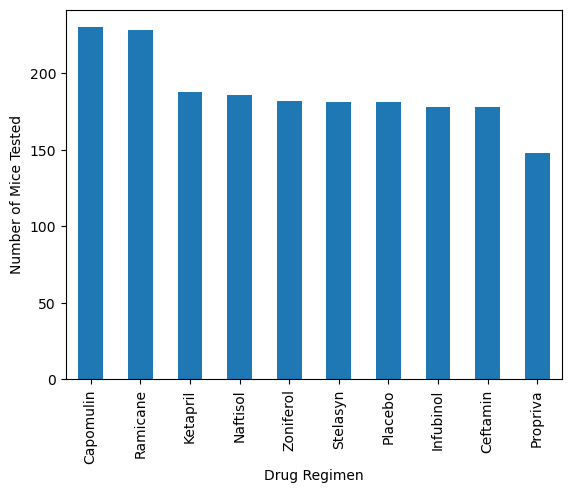

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pandas_bar = timepoints.plot.bar() 
pandas_bar.set_xlabel('Drug Regimen')
pandas_bar.set_ylabel('Number of Mice Tested')
pandas_bar

<BarContainer object of 10 artists>

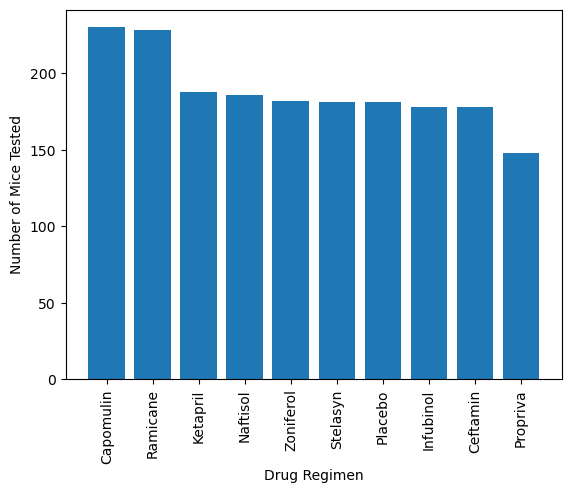

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using PyPlot.
x_axis = timepoints.index.values
y_axis = timepoints.values
pyplot_bar = plt.bar(x_axis, y_axis)
plt.xlabel('Drug Regimen')
plt.xticks(rotation = 'vertical')
plt.ylabel('Number of Mice Tested')
pyplot_bar

<AxesSubplot:title={'center':'Female vs. Male Mice'}, ylabel='Sex'>

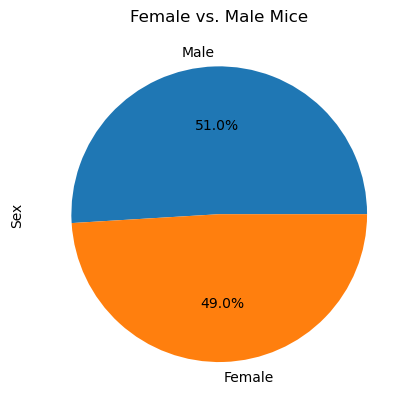

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = cleaned_df['Sex'].value_counts()
pandas_pie = mice_sex.plot.pie(autopct= '%1.1f%%')
plt.title('Female vs. Male Mice')
pandas_pie

([<matplotlib.patches.Wedge at 0x7ff430689b20>,
 [Text(0.06287182338377972, -1.0982017728197306, 'Female'),
  Text(-0.06287182338377958, 1.0982017728197306, 'Male')],
 [Text(0.03429372184569803, -0.599019148810762, '49.0%'),
  Text(-0.034293721845697955, 0.599019148810762, '51.0%')])

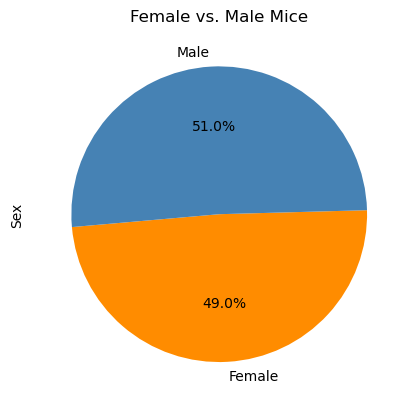

In [21]:
females = (cleaned_df['Sex'] == 'Female').sum() / timepoints.sum() * 100
males = (cleaned_df['Sex'] == 'Male').sum() / timepoints.sum() * 100
sizes = [females, males]
labels = ['Female', 'Male']
colors = ['darkorange', 'steelblue']
pyplot_pie = plt.pie(sizes, labels= labels, autopct= '%1.1f%%', colors= colors, startangle=185)
plt.title('Female vs. Male Mice')
plt.ylabel('Sex')
pyplot_pie

Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_df.groupby('Mouse ID').max()['Timepoint'].reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_data = pd.merge(cleaned_df, last_timepoint, on=['Mouse ID', 'Timepoint'])

In [54]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumors = final_data.loc[final_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_data.append(tumors)
    # Determine outliers using upper and lower bounds
for i in range(len(treatments)):
    quartiles  =  tumor_data[i].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_data[i].loc[(tumor_data[i] < lower_bound) |  (tumor_data[i] > upper_bound)]
    print(f"{treatments[i]}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 29    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


/var/folders/43/r_bypjnx32144lhz2_pr5jrc0000gn/T/ipykernel_27050/3980721420.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatments)


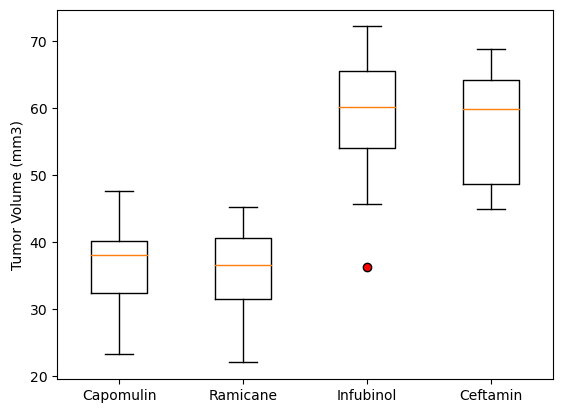

In [76]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xticklabels(treatments)
outlier = dict(markerfacecolor='red')
bp = ax1.boxplot(tumor_data, flierprops=outlier)
plt.show()

Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

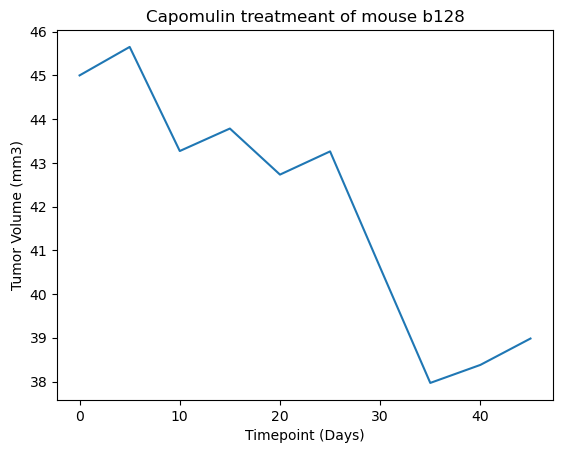

In [66]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin', :]
capomulin_mouse = capomulin_df.loc[capomulin_df['Mouse ID'] == 'b128', :]
x_axis = capomulin_mouse['Timepoint']
tumor_volume = capomulin_mouse['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse b128')
plt.plot(x_axis, tumor_volume)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

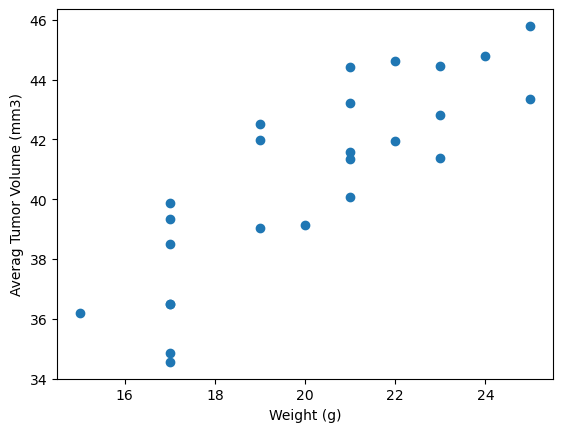

In [68]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avg_tumor = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(avg_tumor['Weight (g)'],avg_tumor['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')

Correlation and Regression

In [71]:
# Calculate the correlation coefficient and linear regression model 
correlation = st.pearsonr(avg_tumor['Weight (g)'], avg_tumor['Tumor Volume (mm3)'])
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation.statistic,2)}")

The correlation between mouse weight and the average tumor volume is 0.84


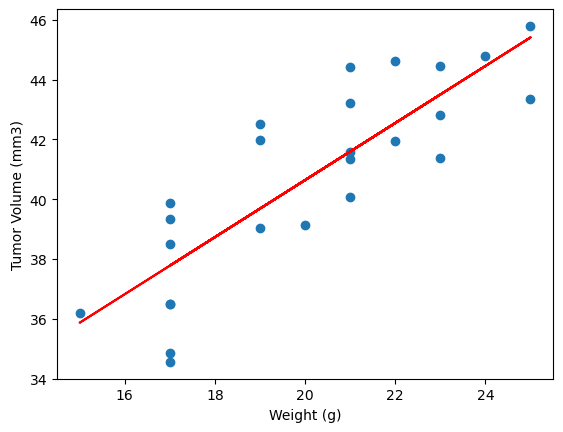

In [74]:
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(avg_tumor["Weight (g)"],avg_tumor["Tumor Volume (mm3)"])
regress_values=avg_tumor["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_tumor["Weight (g)"],avg_tumor["Tumor Volume (mm3)"])
plt.plot(avg_tumor["Weight (g)"], regress_values, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()